In [1]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

In [2]:
!python --version

Python 3.12.7


GPU availability?

In [3]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("CUDA Version:", tf.sysconfig.get_build_info()['cuda_version'])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

2025-03-31 09:07:34.756880: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-31 09:07:34.766386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743392254.777714  424183 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743392254.781070  424183 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 09:07:34.792558: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

TensorFlow version 2.18.0
CUDA Version: 12.5.1
Num GPUs Available:  1


1

Select one GPU

        Restrict code to use a particular GPU...

In [4]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

In [5]:
# select_gpu = gpus[gpu_id]
memory_limit = 8 #GB
select_a_gpu(gpus, gpu_id = 0, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

1 Physical GPUs available 
Selected 1 Logical GPU with 8 GB memory limit


I0000 00:00:1743392255.766596  424183 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8192 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


## 1D: DWT, IDWT \& Perfect Reconstruction of sequences

In [6]:
from TFDWT.DWTIDWT1Dv1 import DWT1D, IDWT1D

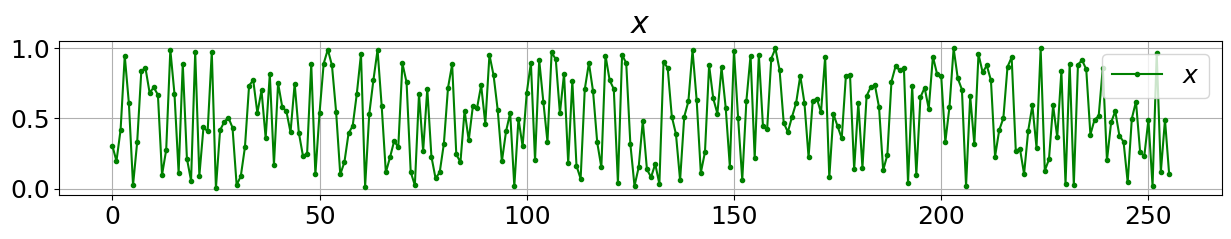

Raw x shape (256,)


In [7]:
# 1D dwt
N = 256 # length of the sequence
input_shape = (N,1)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
x = np.random.rand(input_shape[0])
# x = tmpx
plt.figure(figsize=(15,2))
plt.plot(x, 'g.-',label='$x$')
plt.legend(), plt.grid()
plt.title('$x$')
plt.show()
print(f"Raw x shape {x.shape}")


    DWT 1D 

In [8]:
mother_wavelet = 'bior3.1' # max 'db8' for lenght 16 signal
# mother_wavelet = 'haar' # max 'db8' for lenght 16 signal
# mother_wavelet = 'db10' # max 'db8' for lenght 16 signal

newx = tf.expand_dims(tf.expand_dims(x,-1),0)
print(f'x shape {newx.shape}')
dwtout = DWT1D(wave=mother_wavelet)(newx)
print(f'DWT(x) shape {dwtout.shape}, \nDWT(x) := {dwtout}')


x shape (1, 256, 1)
DWT(x) shape (1, 128, 2), 
DWT(x) := [[[ 1.92794517e-01  1.59331739e-01]
  [ 2.08726346e-01  5.39743900e-03]
  [ 1.48791957e+00 -1.10210627e-01]
  [-1.34090513e-01  1.21907607e-01]
  [ 1.43954182e+00 -5.08985519e-02]
  [ 9.46656942e-01  5.40357232e-02]
  [ 4.58542764e-01 -2.23901361e-01]
  [ 1.06666100e+00  2.75595427e-01]
  [ 1.68843448e-01 -2.80548930e-01]
  [ 1.10851693e+00 -3.47705841e-01]
  [ 9.80420530e-01  5.05938828e-01]
  [ 7.22686946e-02  2.82564878e-01]
  [ 1.30852842e+00  3.77193719e-01]
  [-6.88967854e-02  3.07483464e-01]
  [ 7.38108397e-01  1.35663152e-02]
  [ 2.77165562e-01 -1.43078953e-01]
  [ 1.37536854e-01 -1.55785531e-02]
  [ 1.30066872e+00 -2.21337378e-02]
  [ 9.11153197e-01  1.58249468e-01]
  [ 9.38103080e-01  3.34579617e-01]
  [ 4.81736720e-01  3.49350512e-01]
  [ 7.92803168e-01  4.58950102e-02]
  [ 8.80442619e-01  2.10279047e-01]
  [ 3.17283511e-01 -4.55319881e-04]
  [ 1.08601165e+00  3.61400813e-01]
  [ 4.89704311e-02  2.31470734e-01]
  [ 1.4

2025-03-31 09:07:36.319413: I external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1193] failed to allocate 8.00GiB (8589934592 bytes) from device: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory


    IDWT 1D

IDWT(DWT(x)) shape (1, 256, 1) 
IDWT(DWT(x)) := [[[0.3062312 ]
  [0.19538286]
  [0.41841352]
  [0.9447908 ]
  [0.6053875 ]
  [0.02364938]
  [0.3306631 ]
  [0.8368152 ]
  [0.8576886 ]
  [0.6812092 ]
  [0.7195749 ]
  [0.66711366]
  [0.09681886]
  [0.27526793]
  [0.9870321 ]
  [0.67310834]
  [0.11086823]
  [0.88733613]
  [0.21352123]
  [0.0563447 ]
  [0.96944916]
  [0.09081283]
  [0.43599078]
  [0.40655482]
  [0.9731352 ]
  [0.00200194]
  [0.41528136]
  [0.4735843 ]
  [0.50541276]
  [0.43402416]
  [0.02505225]
  [0.08787384]
  [0.29416975]
  [0.7320655 ]
  [0.77142835]
  [0.5374655 ]
  [0.6986038 ]
  [0.3596493 ]
  [0.8140253 ]
  [0.16906382]
  [0.7499444 ]
  [0.58044225]
  [0.5504232 ]
  [0.40026602]
  [0.7462091 ]
  [0.39873454]
  [0.23198912]
  [0.24854852]
  [0.8860876 ]
  [0.10021475]
  [0.5375862 ]
  [0.88880605]
  [0.9891008 ]
  [0.8757291 ]
  [0.5461907 ]
  [0.10070377]
  [0.18770938]
  [0.39214814]
  [0.44580954]
  [0.67546386]
  [0.95601416]
  [0.01441395]
  [0.53164494]
  [0.77

([<matplotlib.lines.Line2D at 0x7fc41033e2d0>],
 Text(0.5, 1.0, 'reconstuction using bior3.1'))

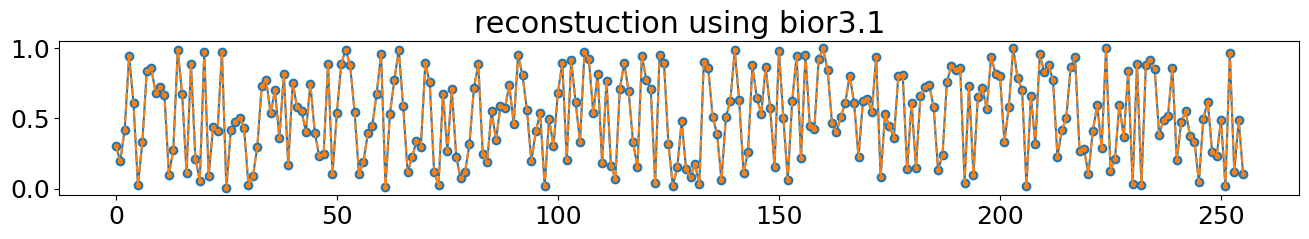

In [9]:
# print(dwtout.shape)
idwtout = IDWT1D(wave=mother_wavelet)(dwtout)
print(f'IDWT(DWT(x)) shape {idwtout.shape} \nIDWT(DWT(x)) := {idwtout}')

print(f'Check perfect reconstruction \nIDWT(DWT(x)) := {idwtout.numpy()} \n\nInput x is {x} ')

    

plt.figure(figsize=(16,2))
plt.plot(x,'o-')
plt.plot(idwtout.numpy()[0,:], '.--'), plt.title(f"reconstuction using {mother_wavelet}")

## 2D: DWT, IDWT \& Perfect Reconstruction of Images

In [10]:
from TFDWT.DWTIDWT2Dv1 import DWT2D, IDWT2D

raw x shape: (814, 800)
x shape: (512, 512)


Text(0.5, 1.0, 'input $x$')

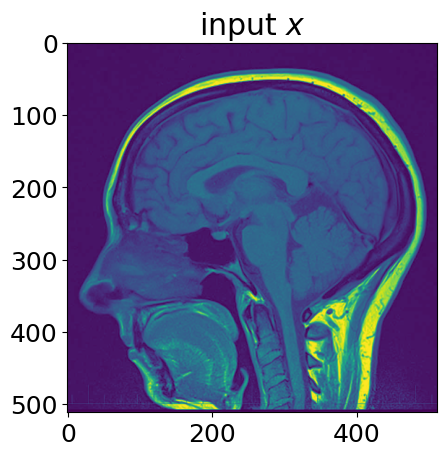

In [11]:
import cv2
x = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x.shape)
x = cv2.resize(x, (512,512))
print('x shape:', x.shape)
#x = x/np.max(x)

import matplotlib.pyplot as plt
plt.imshow(x,label='$x$')
plt.title('input $x$')

raw x shape: (256, 256)


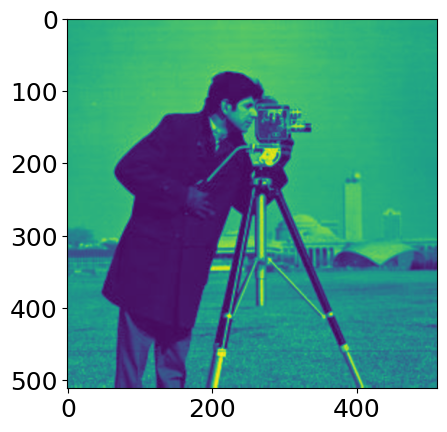

In [12]:
x1 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/cameraman.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x1.shape)
x1 = cv2.resize(x1, (512,512))
# print('x shape:', x.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x1,label='$x$')

raw x shape: (256, 256)
x shape: (512, 512)


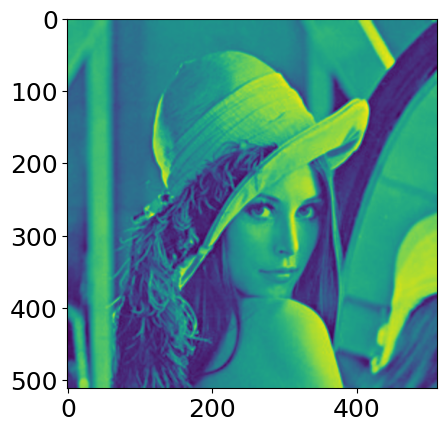

In [13]:
x2 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/lena.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x2.shape)
x2 = cv2.resize(x2, (512,512))
print('x shape:', x2.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x2,label='$x$')

    Sample input for 2D TensorFlow layer

In [14]:
x.shape
xnew = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=0)
xnew.shape

xnew1 = tf.expand_dims(tf.expand_dims(x1, axis=-1), axis=0)
xnew1.shape

xnew2 = tf.expand_dims(tf.expand_dims(x2, axis=-1), axis=0)
xnew2.shape


# xnew1 = tf.transpose(xnew, perm=[0,2,1,3])
# xnew1.shape
# del x, x1

xnew = tf.cast(xnew, dtype=tf.float32)/255
xnew1 = tf.cast(xnew1, dtype=tf.float32)/255
xnew2 = tf.cast(xnew2, dtype=tf.float32)/255
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))
print(tf.reduce_min(xnew1)), print(tf.reduce_max(xnew1))
print(tf.reduce_min(xnew2)), print(tf.reduce_max(xnew2))

_1 = tf.concat([xnew,xnew1,xnew2],axis=-1)
_2 = tf.concat([xnew2,xnew,xnew1],axis=-1)
xnew = tf.cast(tf.concat([_1,_2], axis=0), dtype=tf.float32)
_1.shape,_2.shape, xnew.shape, _1.dtype,_2.dtype, xnew.dtype
# del _1, _2

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.003921569, shape=(), dtype=float32)
tf.Tensor(0.99215686, shape=(), dtype=float32)
tf.Tensor(0.09803922, shape=(), dtype=float32)
tf.Tensor(0.9254902, shape=(), dtype=float32)


(TensorShape([1, 512, 512, 3]),
 TensorShape([1, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 tf.float32,
 tf.float32,
 tf.float32)

In [15]:
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


(None, None)

    DWT 2D

(2, 256, 256, 12)
tf.Tensor(-0.31083655, shape=(), dtype=float32)
tf.Tensor(2.4014206, shape=(), dtype=float32)


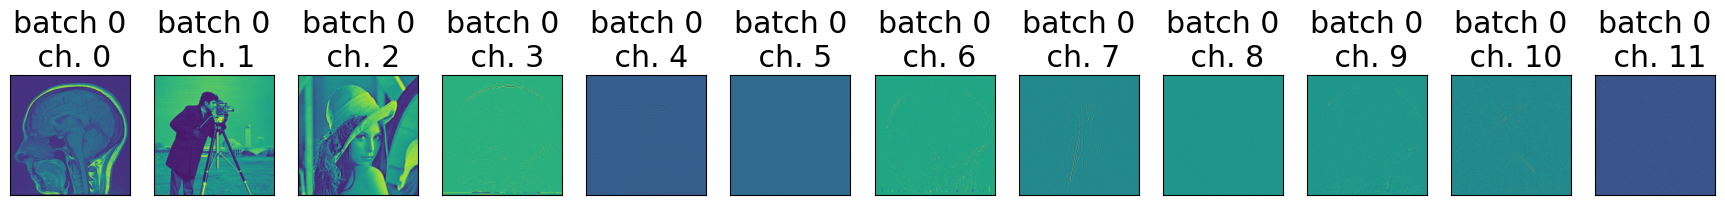

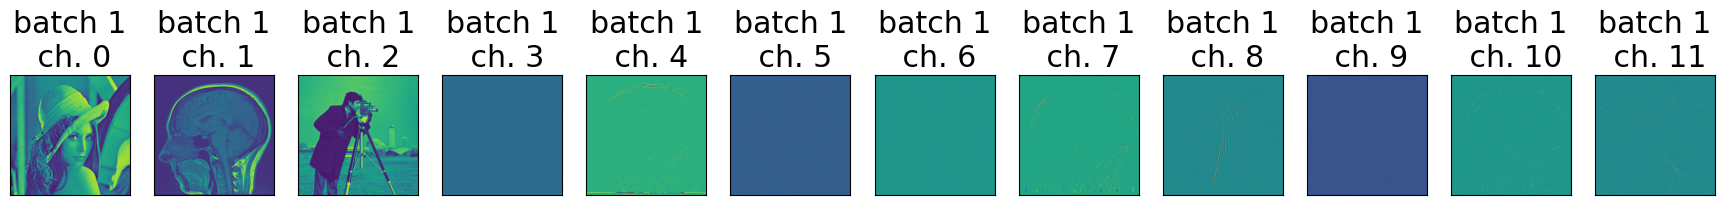

In [16]:
wave = 'haar'
wave = 'db6'
wave = 'bior3.1'
coeffs = DWT2D(wave=wave)(xnew)
print(coeffs.shape)
print(tf.reduce_min(coeffs)), print(tf.reduce_max(coeffs))
# import matplotlib.pyplot as plt

def plotall(_, thresh=0):
    # _ = coeffs
    for b in range(_.shape[0]):
        plt.figure(figsize=(22,8))
        for c in range(_.shape[-1]):
            plt.subplot(1, _.shape[-1], c+1), 
            if thresh==0:
                plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\n ch. {c}')
            else:
                plt.imshow(_[b,:,:,c]>thresh), plt.title(f'batch {b}\n ch. {c}')
            plt.xticks([])
            plt.yticks([])
        plt.show()
plotall(coeffs, 0)    

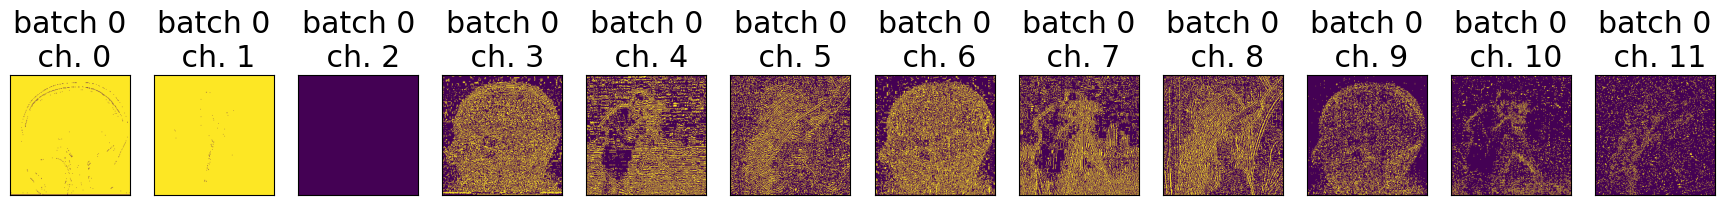

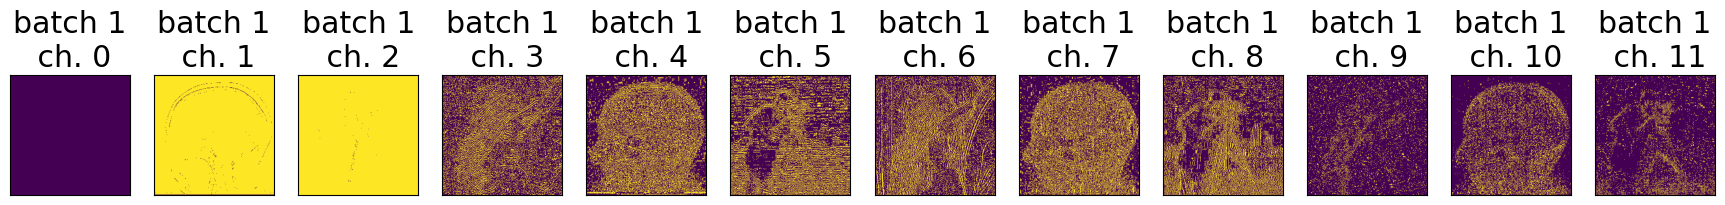

In [17]:
plotall(coeffs, 0.001) 

In [18]:
coeffs.shape

TensorShape([2, 256, 256, 12])

    IDWT 2D

(2, 512, 512, 3) <dtype: 'float32'>


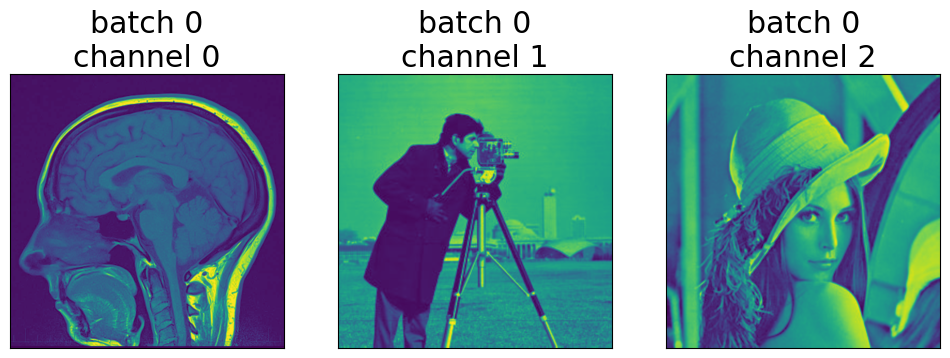

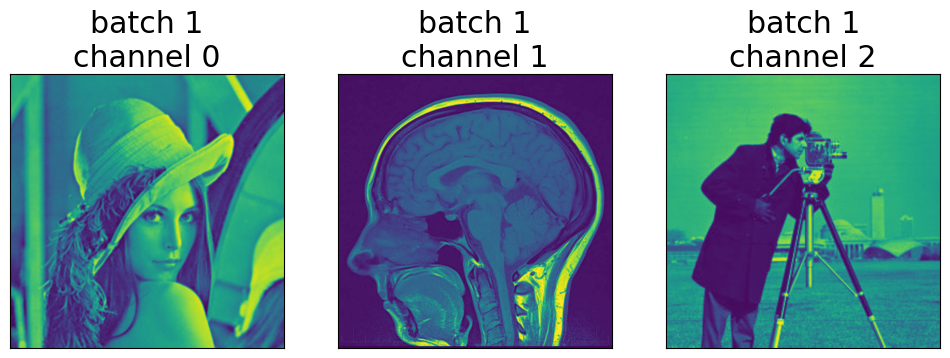

In [19]:
out = IDWT2D(wave=wave)(coeffs)
# [_.shape for _ in out]
print(out.shape, out.dtype)
# import matplotlib.pyplot as plt
_ = out
for b in range(_.shape[0]):
    plt.figure(figsize=(12,4))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\nchannel {c}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [20]:
xnew.shape, out.shape, tf.reduce_sum(tf.square(xnew)), tf.reduce_sum(tf.square(out))

(TensorShape([2, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=332461.6875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=332183.4375>)

In [21]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

## 3D: DWT, IDWT \& Perfect Reconstruction


In [22]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src/TFDWT.pypi/TFDWT'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from DWTIDWT3Dv1 import DWT3D, IDWT3D

In [23]:
# from TFDWT.DWTIDWT3Dv1 import DWT3D, IDWT3D

In [24]:
x3d = tf.random.uniform((2, 16, 16, 16, 3))

In [25]:
LLLLLHLHLLHHHLLHLHHHLHHH = DWT3D(wave=wave)(x3d)      # Analysis
x_hat = IDWT3D(wave=wave)(LLLLLHLHLLHHHLLHLHHHLHHH) # Synthesis

Biothogonal wavelet bior3.1


In [26]:
x_hat.shape, LLLLLHLHLLHHHLLHLHHHLHHH.shape

(TensorShape([2, 16, 16, 16, 3]), TensorShape([2, 8, 8, 8, 24]))